In [287]:
import pandas as pd
import numpy as np

In [288]:
encodings_to_try = ['utf-8', 'ISO-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('/content/sample_data/spam.csv', encoding=encoding)
        print(f"Successfully read the file using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file using encoding: {encoding}")

Failed to read the file using encoding: utf-8
Successfully read the file using encoding: ISO-8859-1


In [289]:
#show the first five rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [290]:
#show the rows and columns in the dataset
df.shape

(5572, 5)

# **Step 1 - Data Cleaning**

In [291]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [292]:
#drop last three columns
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [293]:
#show first five rows of the dataset
df.sample(5)

,v1,v2
4069,ham,Ok i wont call or disturb any one. I know all ...
4804,ham,Sorry for the delay. Yes masters
1635,ham,You have come into my life and brought the sun...
3916,ham,Eh ur laptop got no stock lei... He say mon mu...
3507,ham,"Camera quite good, 10.1mega pixels, 3optical a..."


In [294]:
#rename the column
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)

df.sample(5)

,target,text
3661,ham,"What are you doing in langport? Sorry, but I'l..."
4200,ham,Wylie update: my weed dealer carlos went to fr...
88,ham,I'm really not up to it still tonight babe
1257,ham,Am also doing in cbe only. But have to pay.
439,ham,But i have to. I like to have love and arrange.


In [295]:
#encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [296]:
df['target'] = encoder.fit_transform(df['target'])

In [297]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [298]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [299]:
#check duplicate values
df.duplicated().sum()

403

In [300]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

# **Step 2 - EDA**

In [301]:
#show the spam and ham
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

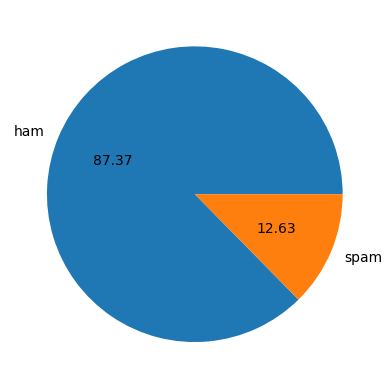

In [302]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a 'target' column
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


In [303]:
#data is imbalanced

In [304]:
import nltk

In [305]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [306]:
#number of characters in a sms
df['num_characters'] = df['text'].apply(len)

In [307]:
#fetch number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [308]:
#fetch number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [309]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [310]:
#describe the dataframe
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [311]:
#for ham massages
df[df['target'] == 0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [312]:
#for spam massages
df[df['target'] == 1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [313]:
#plot histogram for ham and spam
import seaborn as sns

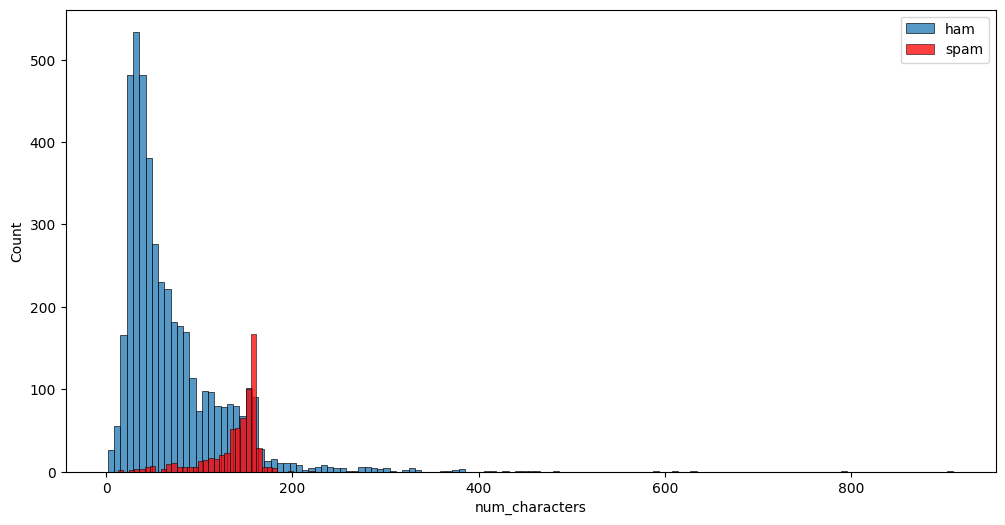

In [314]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='spam')
plt.legend()


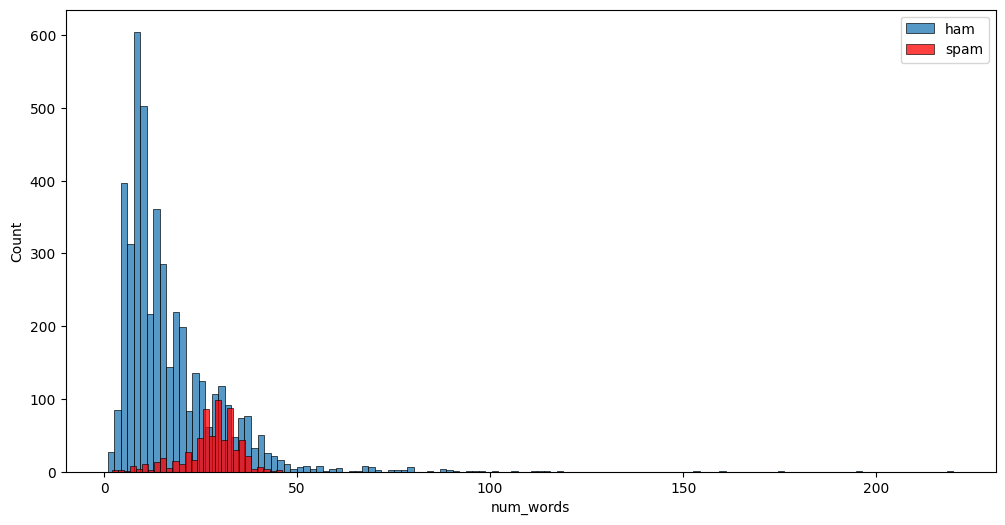

In [315]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'], label='ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='spam')
plt.legend()

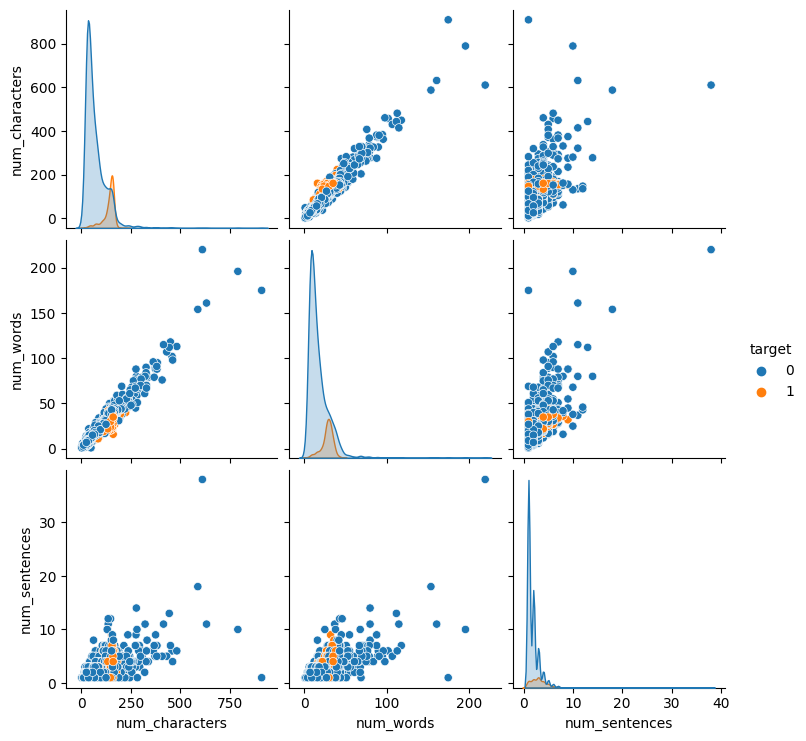

In [316]:
#find out the relation between characters, words, and sentences
sns.pairplot(df, hue = 'target')

<ipython-input-317-890a373e7d41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

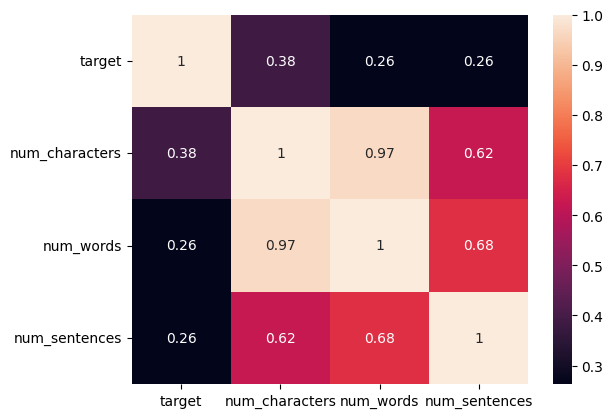

In [317]:
#show the correlation between columns
sns.heatmap(df.corr(), annot = True)

# **Step 3 - Data Preprocessing**

Lower case

Tokenization

Removing special characters

Removing stop words and punctuations

Stemming

In [318]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Import the Porter Stemmer
import string

In [319]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [320]:
# Initialize the Porter Stemmer
ps = PorterStemmer()

In [321]:
def transform_text(text):

  #make lowercase
  text = text.lower()

  #tokenization
  text = nltk.word_tokenize(text)

  #removing special charactes
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  #removing stop words and punctuation
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #stemming
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [322]:
df['transform_text'] = df['text'].apply(transform_text)

In [323]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


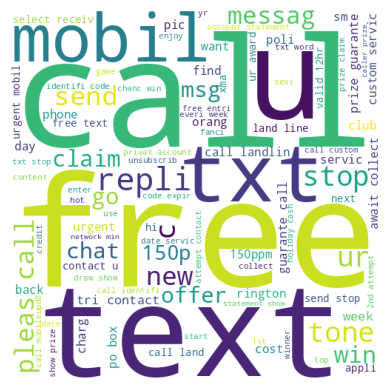

In [324]:
#for spam massages
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


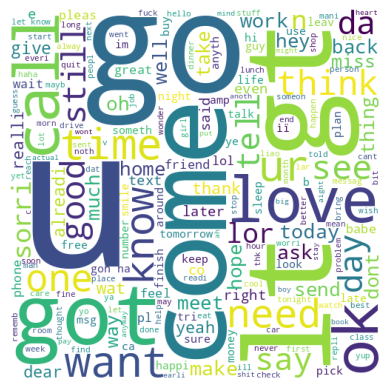

In [325]:
#for ham massages
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [326]:
spam_corpus = []
#find out top 30 words which is used most in spam
for msg in  df[df['target'] ==  1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [327]:
len(spam_corpus)

9939

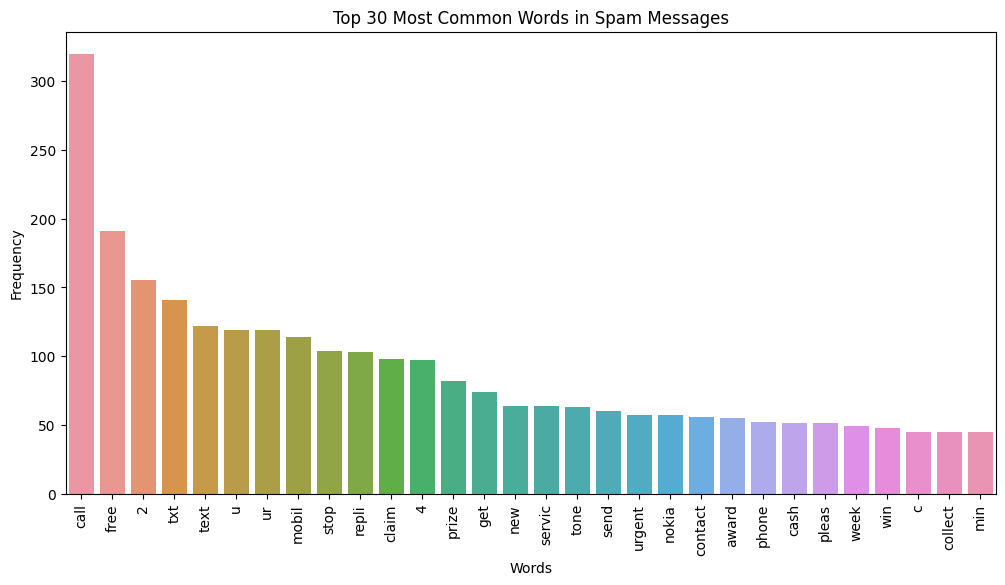

In [328]:
from collections import Counter

# Create a DataFrame of the most common 30 words
word_counts = Counter(spam_corpus).most_common(30)
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=word_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [329]:
spam_corpus = []
#find out top 30 words which is used most in ham
for msg in  df[df['target'] ==  0]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

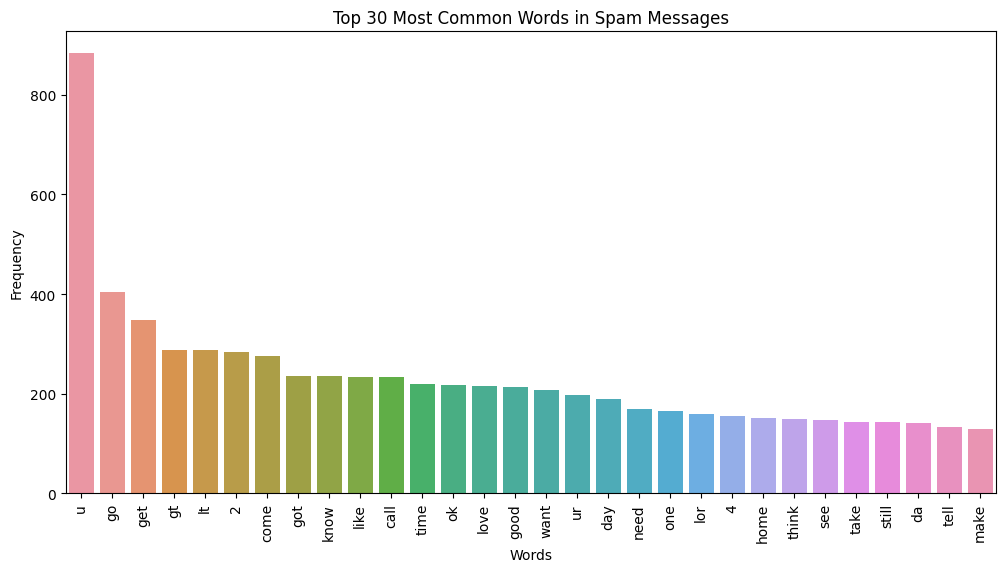

In [330]:
from collections import Counter

# Create a DataFrame of the most common 30 words
word_counts = Counter(spam_corpus).most_common(30)
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=word_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

# **Step 4 - Model Building**

In [331]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the vectorizers
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [332]:
# Fit and transform your text data into a document-term matrix
X = tfidf.fit_transform(df['transform_text']).toarray()

In [333]:
X.shape

(5169, 3000)

In [334]:
y = df['target'].values

In [335]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [336]:
from sklearn.model_selection import train_test_split

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [338]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [339]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [340]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [341]:
mnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [342]:
# Fit the classifier with the training data
bnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = bnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Precision Score:", precision)

Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


In [343]:
#tfidf --> BNB

In [344]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [345]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)
bnb = BernoulliNB()

In [346]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb,
    'BNB' : bnb
}

In [347]:
def train_classifier(clf, X_train, y_train, X_test, x_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [348]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [349]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

  print('For', name)
  print("Accuracy -", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy - 0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision -  1.0
For DT
Accuracy - 0.9274661508704062
Precision -  0.8118811881188119
For LR
Accuracy - 0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy - 0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy - 0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy - 0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy - 0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy - 0.9671179883945842
Precision -  0.9262295081967213
For BNB
Accuracy - 0.9835589941972921
Precision -  0.991869918699187


In [350]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [351]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
10,BNB,0.983559,0.991870
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217


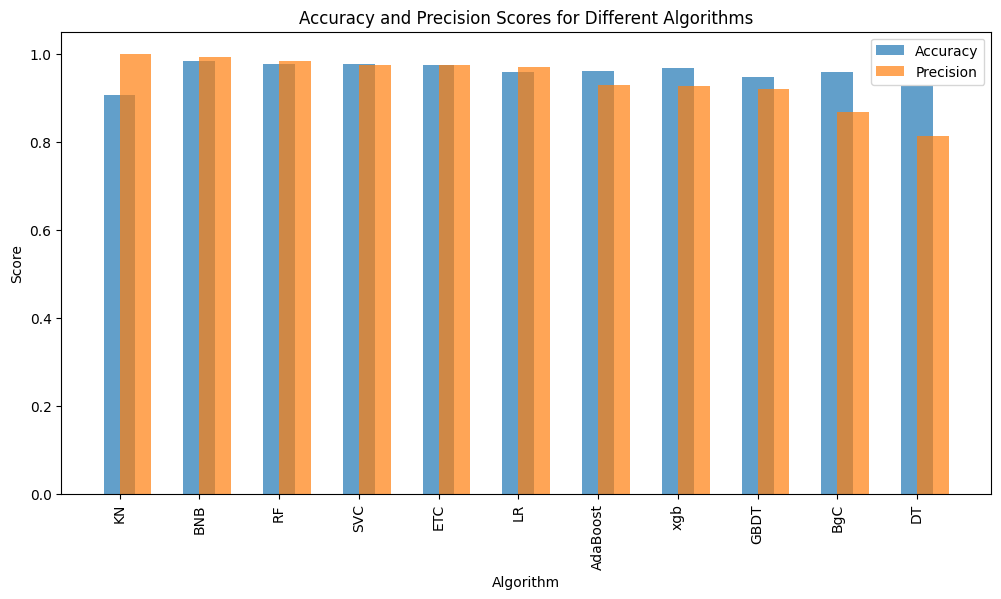

In [352]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

# Create a bar plot to show both accuracy and precision scores
fig, ax = plt.subplots(figsize=(12, 6))

# Plot accuracy scores
ax.bar(performance_df['Algorithm'], performance_df['Accuracy'], width=0.4, label='Accuracy', align='center', alpha=0.7)

# Plot precision scores
ax.bar(performance_df['Algorithm'], performance_df['Precision'], width=0.4, label='Precision', align='edge', alpha=0.7)

# Set plot labels and title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores for Different Algorithms')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

# **Model Improvement**

In [353]:
#step - 1: Tfidf max_features(3000)
#step - 2: Scaling the X value(X.fit_transform)
#step - 3: Voting: combination of best performance algorithms
#step - 4: stacking

In [354]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))